In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
path = "../data_extinction/without_pills/"

# check available runs
os.listdir(path)

['1659304908.conf',
 '1659304908.data',
 '1659305246.conf',
 '1659305246.data',
 '1659305282.conf',
 '1659305282.data',
 '1659305308.conf',
 '1659305308.data',
 '1659305434.conf',
 '1659305434.data',
 '1659305469.conf',
 '1659304908_heatmap.png']

In [3]:
# choose a run for analysis
selected_run = "1659304908"

# print configuration used
with open(f"{path}{selected_run}.conf", 'r') as f:
    for line in f.readlines():
        print(line)

autoplayer_ann_mode = nb4

ghost_chase_time = 5

ghost_scatter_time = 2

default_zoom = 3

difficulty = 3

seed = 1659304908

autoplayer_ann_depth = 1

autoplayer_ann_width = 7

ghost_speed_factor = 10

ghost_active_population = 1

ghost_population = 100

ghost_target_spread = 4

autoplayer_speed_factor = 10

autoplayer_active_population = 1

autoplayer_population = 3000

autoplayer_search_path_length = 5

autoplayer_mutate_chance = 0.05

autoplayer_mutate_percentage = 0.05



In [4]:
data = pd.read_csv(f"{path}{selected_run}.data", skipinitialspace = True)
print(data.head())
print("---------")
print(data.columns)
print("---------")
print(data.dtypes)

    timestamp  actor_id actor_type event_type  cell_x  cell_y
0  1659304908         1      ghost    created       0       0
1  1659304908         2     player    created       0       0
2  1659304911         2     player  destroyed       7       7
3  1659304911         3     player    created       7       7
4  1659304911         3     player  destroyed      13      11
---------
Index(['timestamp', 'actor_id', 'actor_type', 'event_type', 'cell_x',
       'cell_y'],
      dtype='object')
---------
timestamp      int64
actor_id       int64
actor_type    object
event_type    object
cell_x         int64
cell_y         int64
dtype: object


In [5]:
data["event_type"]

0           created
1           created
2         destroyed
3           created
4         destroyed
            ...    
202626    destroyed
202627      created
202628    destroyed
202629      created
202630    destroyed
Name: event_type, Length: 202631, dtype: object

In [6]:
data_creation = data[data["event_type"] == "created"]
data_creation.head()

,timestamp,actor_id,actor_type,event_type,cell_x,cell_y
0,1659304908,1,ghost,created,0,0
1,1659304908,2,player,created,0,0
3,1659304911,3,player,created,7,7
5,1659304911,4,player,created,13,11
7,1659304912,5,player,created,3,6


In [7]:
data_destruction = data[data["event_type"] == "destroyed"]
data_destruction.head()

,timestamp,actor_id,actor_type,event_type,cell_x,cell_y
2,1659304911,2,player,destroyed,7,7
4,1659304911,3,player,destroyed,13,11
6,1659304912,4,player,destroyed,3,6
8,1659304912,5,player,destroyed,23,2
10,1659304913,6,player,destroyed,2,2


In [8]:
# player_destruction heatmap
player_destruction = data_destruction[data_destruction["actor_type"] == "player"]
heatmap_points = list(zip(player_destruction["cell_x"], player_destruction["cell_y"]))
#print(heatmap_points)

<Figure size 432x288 with 0 Axes>

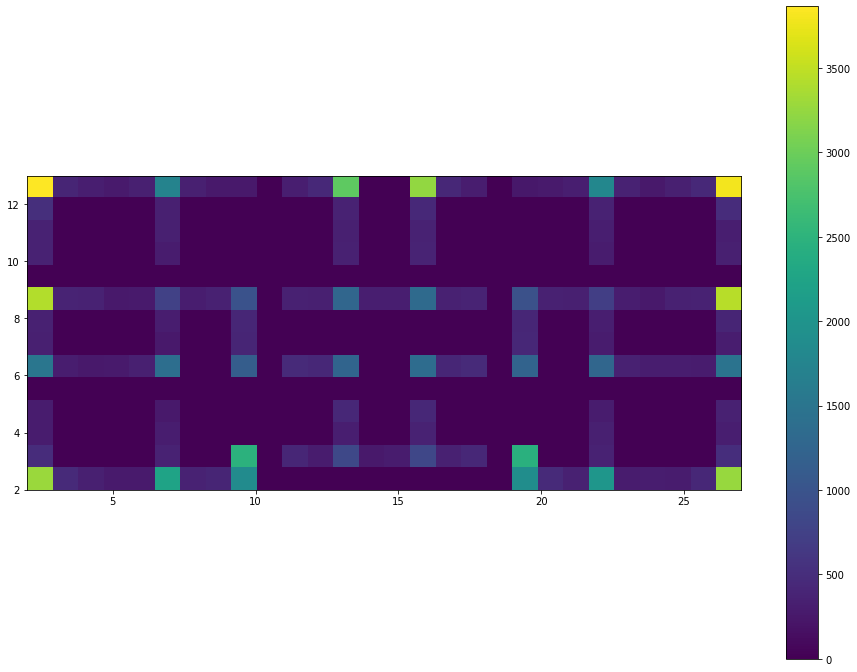

In [13]:
heatmap_hist, xedges, yedges = np.histogram2d(player_destruction["cell_x"], player_destruction["cell_y"], bins = (28, 14))
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
#print(xedges[0] - 1, xedges[-1] + 1, yedges[0] - 1, yedges[-1] + 1)

%matplotlib inline
plt.clf()
plt.figure(figsize=(16,12))
plt.imshow(heatmap_hist.T, extent = extent)
plt.colorbar()
plt.savefig(f"{path}{selected_run}_heatmap.png", dpi=100)
plt.show()